<a href="https://colab.research.google.com/github/Neissandy/AprendizagemMaquina_atv05/blob/master/Atividade_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjuntos de dados pessoais de custos médicos**

Link do dataset GitHub: https://www.kaggle.com/mirichoi0218/insurance

Exercício baseado no passo a passo da aula prática 16/09. As análises e interpretações dos resultados obtidos estão descritos ao decorrer da atividade.


**RECURSOS**:
1. IDADE: idade do beneficiário principal.
2. SEXO: sexo do contratante do seguro: feminino, masculino.
3. BMI: índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg / m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9.
4. FILHOS: Número de filhos cobertos pelo seguro saúde / Número de dependentes.
5. FUMANTE: fumar
6. REGIÃO: área residencial do beneficiário nos EUA: nordeste, sudeste, sudoeste, noroeste.
7. ENCARGOS: despesas médicas individuais cobradas pelo seguro saúde.

**OBJETIVOS**: Prever custos do seguro usando o modelo de regressão.

# Regressão Linear

## 1. Importando bibliotecas necessárias

---

In [185]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## 2. Lendo Dados

---



In [186]:
#Lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
#Verificando quantidade de linhas e colunas de toda a base de dados
dados.shape

(1338, 7)

## 3. Limpeza e organização dos dados

---



In [189]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [190]:
#Convertendo dados para numéricos

region = sorted(dados.region.unique())
dados.region = dados.region.replace(['northeast', 'southeast','southwest', 'northwest' ],[0,1,2,3])

smoker = sorted(dados.smoker.unique())
dados.smoker = dados.smoker.replace(['no', 'yes'],[0,1])

sex = sorted(dados.sex.unique())
dados.sex = dados.sex.replace(['female', 'male'],[0,1])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


**ANÁLISE**: O dataset apresentava dados não numéricos. Para normalisar os dados, foi realizada a conversão dos dados para numéricos: region, sex e smoker.

## 4. Análise preliminar dos dados

---



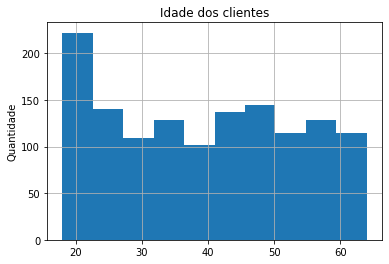

In [191]:
#plotando quantidade de clientes por idade
plt.hist(dados['age'],10)
plt.ylabel('Quantidade')
plt.title('Idade dos clientes')
plt.grid(True)
plt.show()

**ANÁLISE**: Maior parte dos contratantes do seguro são pessoas mais jovens, aproximadamente na faixa de 20 anos.

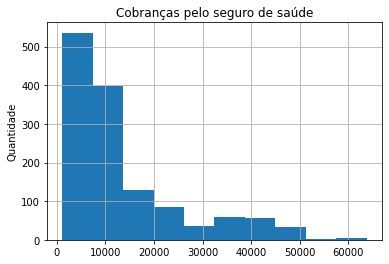

In [192]:
#plotando custo do seguro por clientes
plt.hist(dados['charges'])
plt.ylabel('Quantidade')
plt.title('Cobranças pelo seguro de saúde')
plt.grid(True)
plt.show()

**ANÁLISE**: Maior parte dos clientes tem gastos com saúde aproximadamente abaixo de 13000.

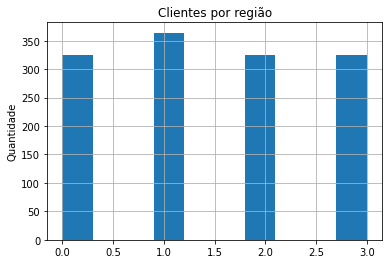

In [193]:
#plotando quantidade de clientes por região dos EUA
plt.hist(dados['region'])
plt.ylabel('Quantidade')
plt.title('Clientes por região')
plt.grid(True)
plt.show()

**ANÁLISE**: A quantidade de clientes por região é praticamente a mesma, entretanto, a região sudeste apresenta uma quantidade maior. Provavelmente as informações sobre região não ajudaram muito a prever os custos.

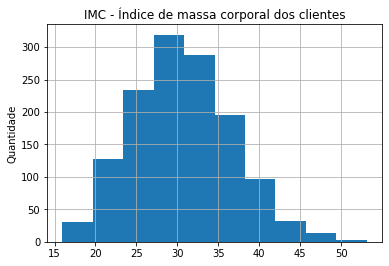

In [194]:
#plotando IMC dos clientes
plt.hist(dados['bmi'])
plt.ylabel('Quantidade')
plt.title('IMC - Índice de massa corporal dos clientes')
plt.grid(True)
plt.show()

**ANÁLISE**: Considerando que um IMC ideal seja entre 18.5 a 24.9, a quantidade de clientes consentrados no gráfico mostra que a maioria está acima do índice. Dessa forma podemos considerar que com um maior IMC, maior se torna as chances de problemas de saúde e dessa forma maiores gastos com saúde. Podemos considerar a possibilidade de outilers nesses dados.

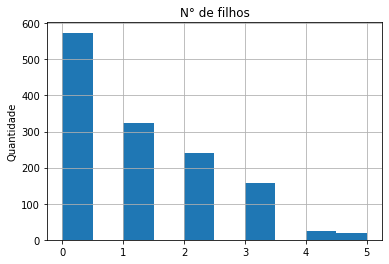

In [195]:
#plotando número de filhos
plt.hist(dados['children'])
plt.ylabel('Quantidade')
plt.title('N° de filhos')
plt.grid(True)
plt.show()

**ANÁLISE**: Maior parte dos clientes não possuem despesas médicas com filhos. Como já analisado anteriormente, por ser a maioria dos contratantes mais jovens, esta seja uma possível explicação.

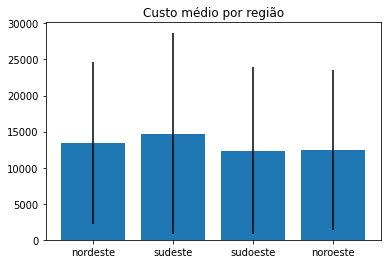

In [196]:
# plotar custos médios do seguro por região
indice = ['nordeste', 'sudeste','sudoeste', 'noroeste']
stats = dados.groupby(['region'],as_index=False)['charges'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Custo médio por região')
plt.show()

**ANÁLISE**: Como previsto anteriormente, os dados sobre região não serão interessantes para prever os custos.

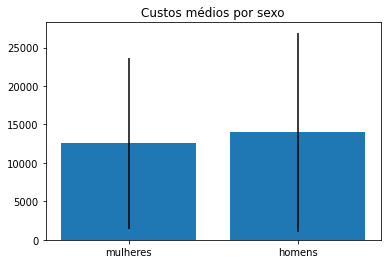

In [197]:
# plotar média de custo por homens e mulheres
indice = ['mulheres','homens']
stats = dados.groupby(['sex'],as_index=False)['charges'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Custos médios por sexo')
plt.show()

**ANÁLISE**: Apesar da quantidade média de clientes homens ser um pouco maior  do que as mulheres, essa informção também não ajuda muito na previsão dos custos.

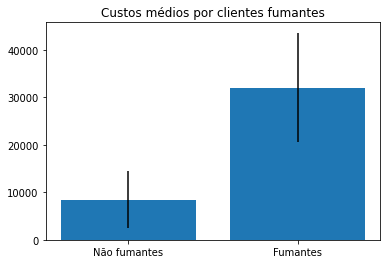

In [198]:
# plotar custo médio por clientes que são fumantes
indice = ['Não fumantes','Fumantes']
stats = dados.groupby(['smoker'],as_index=False)['charges'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Custos médios por clientes fumantes')
plt.show()

**ANÁLISE**: Esse atributo pode ser muito importante para a previsão de custos com saúde. Há uma grande diferença entre os fumantes e não fumantes. Como apresentados no gráfico, os clientes que são fumantes apresentam maior gastos com saúde, como esperado.

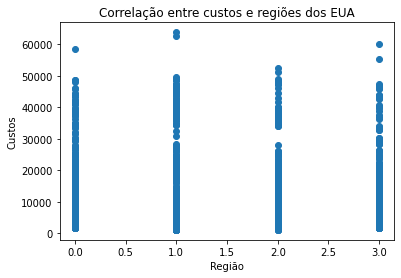

In [199]:
# plotando correlação entre região e custos 
plt.scatter(dados.region,dados.charges)
plt.xlabel('Região')
plt.ylabel('Custos')
plt.title('Correlação entre custos e regiões dos EUA')
plt.show()

**ANÁLISE**: Mais uma vez comprovando que o aumento dos custos e região dos EUA não apresentam correlação.

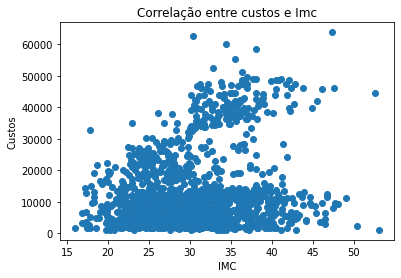

In [200]:
# plotando correlação entre IMC dos clientes e custo
plt.scatter(dados.bmi,dados.charges)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Correlação entre custos e Imc')
plt.show()

**ANÁLISE**: Analisando esse gráfico, há uma certa correlação entre os custos e o IMC. Alguns índices que estão acima do normal interfere em parte nos custos mais elevados.

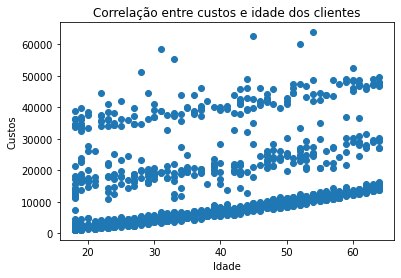

In [201]:
# plotando correlação entre custo e idade dos clientes
plt.scatter(dados.age,dados.charges)
plt.xlabel('Idade')
plt.ylabel('Custos')
plt.title('Correlação entre custos e idade dos clientes')
plt.show()

**ANÁLISE**: O custos médicos e idade também possuem correlação. É possível notar que quanto maior a idade, maior torna-se o custo.

In [202]:
corr = dados.corr()

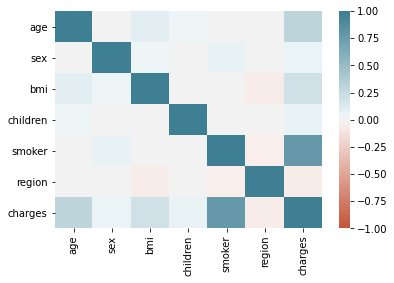

In [203]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

**ANÁLISE**: Como observado antes, as melhores correlações para prever o custo médico foi: IMC, idade e clientes fumantes.

## 5. Re-escala dos dados

---



In [204]:
#Realisando a re-escala dos dados
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,0.666667,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,1.000000,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,1.000000,0.043816


## 6. Organizando dados para modelagem

---



In [205]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.drop(columns=['charges'])
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,0.666667
1,0.000000,1.0,0.479150,0.2,0.0,0.333333
2,0.217391,1.0,0.458434,0.6,0.0,0.333333
3,0.326087,1.0,0.181464,0.0,0.0,1.000000
4,0.304348,1.0,0.347592,0.0,0.0,1.000000


In [206]:
y = dados.charges
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**ANÁLISE**: Os dados foram divididos em X e y. A coluna 'charges' referente aos custos, foi  utilizada como valor a ser previsto. Logo após, divididos em X_train, X_test, y_train e y_test.


## 7.Treinando modelo e fazendo previsão

---



In [208]:
#definido modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

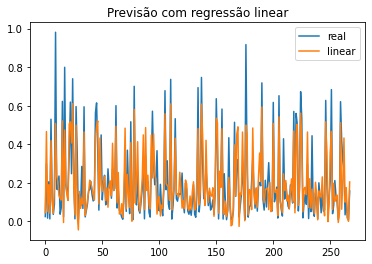

In [209]:
#plotando resultados da Regressão Linear
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [210]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

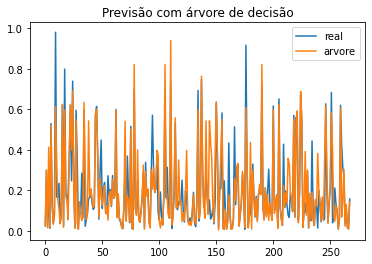

In [211]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [212]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

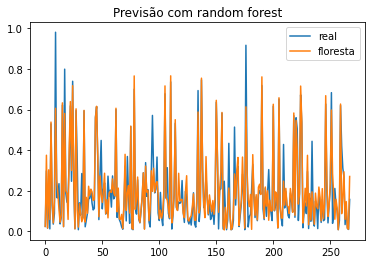

In [213]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [214]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

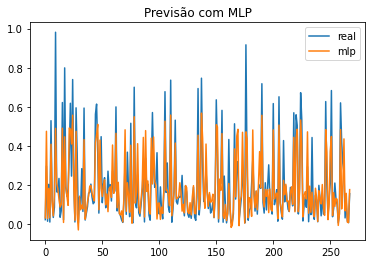

In [215]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

**ANÁLISE**: A regressão linear foi usada para prever o custo com as despesas médicas. Dentre as 4 formas testadas, as que apresentam piores resultados a partir da análise visual do gráfico foram a LinearRegression e MPLRegressor.

## 8. Avaliando Modelos

---



### Mean Absolute Error (MAE)





In [216]:
#Regressão Linear
mean_absolute_error(y_test,pred_linear)

0.07149406232865231

In [217]:
#Árvore
mean_absolute_error(y_test,pred_arvore)

0.054687093583875926

In [218]:
#Random Forest
mean_absolute_error(y_test,pred_floresta)

0.0464855176910491

In [220]:
#MLP
mean_absolute_error(y_test,pred_mlp)

0.06781895650855557

### Mean Squared Error (MSE)

---



In [221]:
#Regressão Linear
mean_squared_error(y_test,pred_linear)

0.010775585157284997

In [222]:
#Árvore
mean_squared_error(y_test,pred_arvore)

0.012515868650281106

In [223]:
#Random Forest
mean_squared_error(y_test,pred_floresta)

0.006553530745052825

In [224]:
#MLP
mean_squared_error(y_test,pred_mlp)

0.011344002009037636

### Root Mean Squared Error (RMSE)

---


In [225]:
#Regressão Linear
mean_squared_error(y_test,pred_linear)**(1/2)

0.10380551602532978

In [226]:
#Árvore
mean_squared_error(y_test,pred_arvore)**(1/2)

0.11187434312781955

In [227]:
#Random Forest
mean_squared_error(y_test,pred_floresta)**(1/2)

0.08095388035821893

In [228]:
#MLP
mean_squared_error(y_test,pred_mlp)**(1/2)

0.10650822507692838

### Mean Absolute Percentage Error (MAPE)

---



In [229]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [230]:
#Regressão Linear
mean_absolute_percentage_error(y_test,pred_linear)

0.6225105198367357

In [231]:
#Árvore
mean_absolute_percentage_error(y_test,pred_arvore)

0.49640679516392633

In [232]:
#Random Forest
mean_absolute_percentage_error(y_test,pred_floresta)

0.46908598506516846

In [233]:
#MLP
mean_absolute_percentage_error(y_test,pred_mlp)

0.46373029362838275

**ANÁLISE**: Diante das avaliações realizadas em cada um dos modelos, a Random Forest apresentou melhor resultado, obtendo a menor taxa de erro.